# Previsão de Doenças Cardíacas através de Aprendizado de Máquina

Este projeto visa investigar a relação entre diversos atributos de pacientes e a presença de doenças cardíacas. Utilizando um conjunto de dados abrangente, exploraremos informações como idade, sexo, tipo de dor no peito, pressão arterial, colesterol e outros indicadores para construir modelos preditivos. O objetivo final é identificar os principais fatores de risco e auxiliar no diagnóstico precoce de doenças cardíacas, contribuindo para a prevenção e tratamento eficazes.
Este relatório detalha o processo de análise dos dados, desde a exploração inicial até a construção e avaliação de modelos preditivos. Serão abordadas as etapas de pré-processamento dos dados, seleção de atributos, treinamento e comparação de diferentes algoritmos de aprendizado de máquina, com o objetivo de identificar o modelo mais eficaz para a previsão de doenças cardíacas.
# Índice

1. [Importar Bibliotecas e ajustar o Ambiente](#imp-lib)
2. [Descrição dos Dados](#data-desc)
3. [Carregando o Data Set](#data-load)
4. [Limpeza e Pré Processamento de Dados](#data-prep)
5. [Detecção e Remoção de Outliers](#data-out)
6. [Treinamento e Divisão de Dados Para Teste](#data-train)
7. [Validação Cruzada](#cross-val)
8. [Construção de Modelo](#data-model)
9. [Avaliação e Comparação de Modelos](#model-eval)
10. [Seleção de Atributos](#model-atrib)
11. [Avaliação de Modelos](#model-inter)
12. [Conclusão](#data-conc)[Conclusão](#data-conc)


## 1. **Importar Bibliotecas**<a id='imp-lib'></a>

In [58]:
import warnings
warnings.filterwarnings('ignore')

# Manipulação de dados e pré-processamento
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seleção de modelo e validação
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    log_loss, roc_auc_score, precision_score, f1_score, recall_score, roc_curve, auc,
    classification_report, confusion_matrix, accuracy_score, fbeta_score, matthews_corrcoef
)

# Algoritmos de ML
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import (
    RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
)
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel
from sklearn.pipeline import Pipeline

# Outras bibliotecas
from sklearn.metrics import precision_recall_curve, average_precision_score
from IPython.display import display, Image, HTML
import xgboost as xgb
import joblib

## 2. **Descrição aprofundada dos Dados**<a id='data-desc'></a>


O conjunto de dados contém 11 atributos que descrevem diferentes características de pacientes o objetivo é prever se o paciente tem ou não doença cardíaca. Abaixo está uma descrição detalhada de cada atributo:


* `age`: Idade do paciente em anos.

* `sex`: Sexo do paciente:
    * 0 = Feminino
    * 1 = Masculino
    
* `Chest Pain Type`: Tipo de dor no peito:
    * 1 = Angina típica: dor no peito relacionada à diminuição do suprimento de sangue para o coração
    * 2 = Angina atípica: dor no peito não relacionada ao coração
    * 3 = Dor não anginosa: tipicamente espasmos esofágicos (não relacionados ao coração)
    * 4 = Assintomática: dor no peito sem sinais de doença 
    
* `Resting BP S`: Pressão arterial em repouso (em mmHg na admissão ao hospital).

* `Cholesterol`: Colesterol sérico em mg/dL (colesterol sérico = LDL + HDL + 0.2 * triglicerídeos).
    - Valores acima de 200 são motivo de preocupação.
    
* `Fasting Blood Sugar`: Açúcar no sangue em jejum > 120 mg/dL:
    * 0 = Falso
    * 1 = Verdadeiro
    * Valores acima de 126 mg/dL indicam diabetes.
    
* `Resting ECG`: Resultados do eletrocardiograma em repouso:
    * 0 = Normal
    * 1 = Anormalidade da onda ST-T: pode variar de sintomas leves a problemas graves, sinaliza batimento cardíaco não normal
    * 2 = Possível ou definida hipertrofia ventricular esquerda: aumento da principal câmara de bombeamento do coração
    
* `Max Heart Rate`: Frequência cardíaca máxima alcançada.

* `Exercise Angina`: Angina induzida por exercício:
    * 0 = Não
    * 1 = Sim
    
* `Oldpeak`: Depressão do segmento ST induzida por exercício em relação ao repouso (observa o estresse do coração durante o exercício).
    * Um coração doente se estressará mais.   
    
* `ST slope`: Inclinação do segmento ST no pico do exercício:
    * 0 = Inclinada para cima: melhor frequência cardíaca com exercício (incomum)
    * 1 = Plano: alteração mínima (coração saudável típico)
    * 2 = Inclinada para baixo: sinais de coração doente


* `Target`: Presença ou ausência de doença cardíaca:
    * 0 = Não
    * 1 = Sim

## Dicionário dos Dados

In [2]:
pd.set_option('display.max_rows', None)
dicionario = pd.read_csv("../data/external/dictionary.csv")
display(HTML(dicionario.to_html(index=False)))

variavel,descricao,tipo,subtipo
age,Idade do paciente em anos.,quantitativa,contínua
sex,"Sexo do paciente (1 = Masculino, 0 = Feminino).",qualitativa,nominal
chest pain type,"Tipo de dor no peito (1: Angina típica, 2: Angina atípica, 3: Dor não anginosa, 4: Assintomático).",qualitativa,ordinal
resting bp s,Pressão arterial em repouso (em mm Hg).,quantitativa,contínua
cholesterol,Colesterol sérico em mg/dl.,quantitativa,contínua
fasting blood sugar,Açúcar no sangue em jejum > 120 mg/dl (1 = Verdadeiro; 0 = Falso).,qualitativa,nominal
resting ecg,"Resultados do eletrocardiograma em repouso (0: Normal, 1: Anormalidade da onda ST-T, 2: Hipertrofia ventricular esquerda).",qualitativa,ordinal
max heart rate,Frequência cardíaca máxima alcançada.,quantitativa,contínua
exercise angina,"Angina induzida por exercício (1 = Sim, 0 = Não).",qualitativa,nominal
oldpeak,Depressão do segmento ST induzida por exercício em relação ao repouso.,quantitativa,contínua


## 3. **Loading Dataset**<a id='data-load'></a>

In [3]:
dt = pd.read_csv('../data/raw/heart_statlog_cleveland_hungary_final.csv')
dt.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


* A análise do conjunto de dados indica a necessidade de codificar características nominais para representar suas categorias. A próxima etapa envolve a aplicação dessa codificação, mapeando cada característica à sua categoria correspondente, conforme a descrição do conjunto de dados.

## 4. **Limpeza e Pré Processamento de Dados** <a id='data-prep'></a>

* Nesta seção, será realizada a limpeza e o pré-processamento dos dados. Isso inclui a padronização dos nomes das colunas, a codificação de variáveis categóricas e a verificação e tratamento de valores ausentes e outliers.

In [4]:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [5]:
# converting features to categorical features 

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'angina típica'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'angina atipica'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'dor não anginosa'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'assintomático'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'anormalidade da onda ST'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'hipertrofia ventricular esquerda'



dt['st_slope'][dt['st_slope'] == 1] = 'cima'
dt['st_slope'][dt['st_slope'] == 2] = 'plana'
dt['st_slope'][dt['st_slope'] == 3] = 'baixo'

dt["sex"] = dt.sex.apply(lambda  x:'masculino' if x==1 else 'feminino')

In [6]:
dt['chest_pain_type'].value_counts()

assintomático       625
dor não anginosa    283
angina atipica      216
angina típica        66
Name: chest_pain_type, dtype: int64

In [7]:
dt['rest_ecg'].value_counts()

normal                              684
hipertrofia ventricular esquerda    325
anormalidade da onda ST             181
Name: rest_ecg, dtype: int64

In [8]:
dt['st_slope'].value_counts()

plana    582
cima     526
baixo     81
0          1
Name: st_slope, dtype: int64

In [9]:
#removendo linha com st_slope=0
dt.drop(dt[dt.st_slope ==0].index, inplace=True)
dt['st_slope'].value_counts()

plana    582
cima     526
baixo     81
Name: st_slope, dtype: int64

* Foi identificada uma inconsistência na variável st_slope, onde um valor igual a 0 estava presente. Como esse valor não se encaixa nas categorias esperadas, optou-se por remover a linha correspondente para garantir a integridade dos dados.

In [10]:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,masculino,angina atipica,140,289,0,normal,172,0,0.0,cima,0
1,49,feminino,dor não anginosa,160,180,0,normal,156,0,1.0,plana,1
2,37,masculino,angina atipica,130,283,0,anormalidade da onda ST,98,0,0.0,cima,0
3,48,feminino,assintomático,138,214,0,normal,108,1,1.5,plana,1
4,54,masculino,dor não anginosa,150,195,0,normal,122,0,0.0,cima,0


### Checando se existem dados faltantes

In [11]:
## Checando dados faltantes
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

Não existem dados faltantes.

In [12]:
dt.shape

(1189, 12)

* Há um total de 1189 registros e 11 características, com 1 variável alvo. A seguir, será verificado o resumo das características numéricas e categóricas. há um total de 1189 registros e 11 características, com 1 variável alvo. A seguir, será verificado o resumo das características numéricas e categóricas.

In [13]:
dt.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


* A análise mostra outliers em `resting_blood_pressure` (mínimo 0) e `cholestrol` (mínimo 0, máximo 603).

In [14]:
dt.describe(include =[object])

,sex,chest_pain_type,rest_ecg,st_slope
count,1189,1189,1189,1189
unique,2,4,3,3
top,masculino,assintomático,normal,plana
freq,908,625,683,582


## 5. **Detecção e Remoção de Outliers** <a id='data-out'></a>

* Nesta etapa, serão identificados e removidos outliers presentes nas variáveis numéricas. O método do Z-score será utilizado para detectar valores extremos que possam distorcer a análise e o desempenho dos modelos.

In [15]:
# Filtrando características numéricas. Idade, pressão arterial em repouso, colesterol e frequência cardíaca máxima atingida apresentam outliers, conforme a Análise Exploratória de Dados (EDA).

dt_numericas = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [16]:
dt_numericas.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [17]:
# Calculando o z-score das colunas numéricas no conjunto de dados
z = np.abs(stats.zscore(dt_numericas))

Será definido um limite para dizer o que é outlier

In [18]:
# Defining threshold for filtering outliers 
limite = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074]), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1]))


In [19]:
# Filtrando outliers, mantendo apenas os pontos de dados que estão abaixo do limite
dt = dt[(z < 3).all(axis=1)]

In [20]:
# Verificando a forma (shape) do conjunto de dados após a remoção de outliers
dt.shape

(1172, 12)

* Após a remoção dos outliers, o próximo passo é preparar o conjunto de dados para o processo de modelagem. Isso envolve a codificação das variáveis categóricas em variáveis dummy, o que permitirá que sejam utilizadas pelos algoritmos de aprendizado de máquina. Em seguida, as variáveis de característica serão separadas da variável alvo, preparando o terreno para a divisão do conjunto de dados em conjuntos de treino e teste.

In [21]:
## transformando variáveis categóricas
dt = pd.get_dummies(dt, drop_first=True)

dt.head()


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_masculino,chest_pain_type_angina típica,chest_pain_type_assintomático,chest_pain_type_dor não anginosa,rest_ecg_hipertrofia ventricular esquerda,rest_ecg_normal,st_slope_cima,st_slope_plana
0,40,140,289,0,172,0,0.0,0,1,0,0,0,0,1,1,0
1,49,160,180,0,156,0,1.0,1,0,0,0,1,0,1,0,1
2,37,130,283,0,98,0,0.0,0,1,0,0,0,0,0,1,0
3,48,138,214,0,108,1,1.5,1,0,0,1,0,0,1,0,1
4,54,150,195,0,122,0,0.0,0,1,0,0,1,0,1,1,0


In [22]:
dt.shape

(1172, 16)

In [23]:
# Separando o conjunto de dados em características (X) e variável alvo (y)
X = dt.drop(['target'],axis=1)
y = dt['target']

## Checando Correlações 

<Axes: title={'center': 'Correlação com Doença Cardíaca'}>

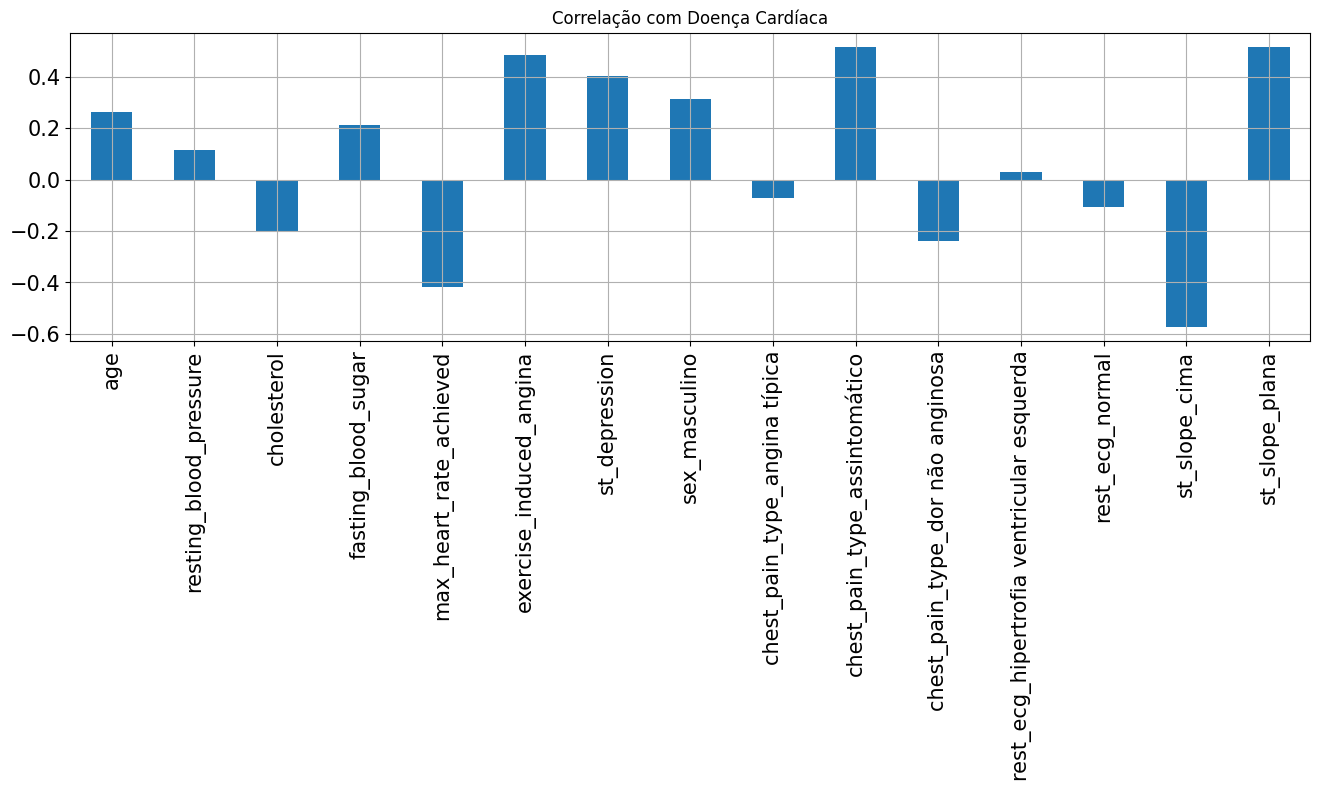

In [24]:

X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlação com Doença Cardíaca", fontsize = 15,
        rot = 90, grid = True)


## 6. **Treinamento e Divisão de Dados Para Teste**  <a id='data-train'></a>

* Agora, o conjunto de dados será dividido em dois subconjuntos: um para treinamento dos modelos (X_train, y_train) e outro para teste e avaliação do desempenho (X_test, y_test). Será garantida uma distribuição equilibrada da variável alvo em ambos os conjuntos.

In [25]:
semente = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=semente)

In [26]:
# Verificando a distribuição da variável alvo na divisão de treino e teste

print('Distribuição da variável alvo no conjunto de treino')
print(y_train.value_counts())

print('Distribuição da variável alvo no conjunto de teste')
print(y_test.value_counts())

Distribuição da variável alvo no conjunto de treino
1    491
0    446
Name: target, dtype: int64
Distribuição da variável alvo no conjunto de teste
1    123
0    112
Name: target, dtype: int64


In [27]:
print('------------Conjunto de Treino------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Conjunto de Teste------------------')
print(X_test.shape)
print(y_test.shape)

------------Conjunto de Treino------------------
(937, 15)
(937,)
------------Conjunto de Teste------------------
(235, 15)
(235,)


### Normalização das Características
Nesta etapa, normalizaremos todas as características numéricas para que estejam no intervalo de 0 a 1.

In [28]:
escalonador = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = escalonador.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_masculino,chest_pain_type_angina típica,chest_pain_type_assintomático,chest_pain_type_dor não anginosa,rest_ecg_hipertrofia ventricular esquerda,rest_ecg_normal,st_slope_cima,st_slope_plana
79,0.428571,0.476190,0.419552,0,0.762963,0,0.295455,1,0,1,0,0,1,0,1
134,0.673469,0.476190,0.598778,0,0.392593,1,0.409091,0,0,1,0,0,0,0,1
999,0.489796,0.361905,0.378819,0,0.911111,0,0.295455,1,1,0,0,1,0,0,1
976,0.469388,0.476190,0.521385,0,0.607407,0,0.352273,0,0,0,1,1,0,1,0
1097,0.183673,0.380952,0.437882,0,0.762963,0,0.295455,0,0,0,1,0,1,1,0


In [29]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = escalonador.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_masculino,chest_pain_type_angina típica,chest_pain_type_assintomático,chest_pain_type_dor não anginosa,rest_ecg_hipertrofia ventricular esquerda,rest_ecg_normal,st_slope_cima,st_slope_plana
1050,0.612245,0.190476,0.505092,0,0.407407,0,0.409091,0,0,1,0,1,0,0,1
1055,0.142857,0.438095,0.574338,0,0.659259,1,0.295455,1,0,1,0,1,0,1,0
1154,0.632653,0.438095,0.443992,1,0.496296,0,0.545455,1,0,0,1,0,1,0,1
214,0.571429,0.476190,0.446029,0,0.718519,0,0.295455,0,0,0,1,0,0,1,0
541,0.693878,0.552381,0.415479,0,0.407407,1,0.431818,1,0,0,1,0,0,0,1


## 7. **Validação Cruzada** <a id='cross-val'></a> 

* A validação cruzada será empregada para avaliar o desempenho de diferentes modelos de aprendizado de máquina e selecionar aqueles com melhor performance. A validação cruzada de 10 folds (k-fold cross-validation) será utilizada para obter estimativas mais robustas do desempenho dos modelos.

In [30]:
# função inicializando modelos de aprendizado de máquina de base

def ObterModelosBase():
    modelosBase = []
    modelosBase.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    modelosBase.append(('LDA'   , LinearDiscriminantAnalysis()))
    modelosBase.append(('KNN7'  , KNeighborsClassifier(7)))
    modelosBase.append(('KNN5'  , KNeighborsClassifier(5)))
    modelosBase.append(('KNN9'  , KNeighborsClassifier(9)))
    modelosBase.append(('KNN11'  , KNeighborsClassifier(11)))
    modelosBase.append(('CART' , DecisionTreeClassifier()))
    modelosBase.append(('NB'    , GaussianNB()))
    modelosBase.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    modelosBase.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    modelosBase.append(('AB'    , AdaBoostClassifier()))
    modelosBase.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    modelosBase.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    modelosBase.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    modelosBase.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    modelosBase.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    modelosBase.append(('MLP', MLPClassifier()))
    modelosBase.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    modelosBase.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    modelosBase.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    modelosBase.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    modelosBase.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
    modelosBase.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return modelosBase

# função para realizar validação cruzada de 10 folds de todos os modelos de base
def LinhaBase2(X_train, y_train, modelos):
    # Opções de teste e métrica de avaliação
    numeroFolds = 10
    pontuacao = 'accuracy'
    resultados = []
    nomes = []
    for nome, modelo in modelos:
        kFold = model_selection.KFold(n_splits=10, random_state=semente, shuffle=True)
        resultadosValidacaoCruzada = model_selection.cross_val_score(modelo, X_train, y_train, cv=kFold, scoring=pontuacao)
        resultados.append(resultadosValidacaoCruzada)
        nomes.append(nome)
        mensagem = "%s: %f (%f)" % (nome, resultadosValidacaoCruzada.mean(), resultadosValidacaoCruzada.std())
        print(mensagem)
        
    return resultados, mensagem

In [31]:
modelos = ObterModelosBase()
nomes,resultados = LinhaBase2(X_train, y_train,modelos)

LR_L2: 0.833528 (0.036665)
LDA: 0.842061 (0.030449)
KNN7: 0.851682 (0.034779)
KNN5: 0.854896 (0.039239)
KNN9: 0.847392 (0.035693)
KNN11: 0.839934 (0.038576)
CART: 0.867776 (0.038210)
NB: 0.841009 (0.034855)
SVM Linear: 0.843125 (0.029394)
SVM RBF: 0.841032 (0.029386)
AB: 0.832475 (0.042060)
GBM: 0.878380 (0.030816)
RF_Ent100: 0.927477 (0.024093)
RF_Gini100: 0.921082 (0.030521)
ET100: 0.920030 (0.028510)
ET500: 0.917902 (0.031823)
MLP: 0.854907 (0.043718)
SGD3000: 0.789796 (0.046795)
XGB_2000: 0.908305 (0.039190)
XGB_500: 0.911508 (0.040324)
XGB_100: 0.914699 (0.036764)
XGB_1000: 0.912571 (0.037323)
ET1000: 0.915740 (0.029416)


## 8. **Construção de Modelo** <a id='data-model'></a>

* Nesta seção, serão construídos e treinados diversos modelos de aprendizado de máquina, incluindo Random Forest, Multi-Layer Perceptron, K-Nearest Neighbors, Extra Trees, XGBoost, Support Vector Machine, Stochastic Gradient Descent, AdaBoost, Decision Tree e Gradient Boosting Machine.

### Random Forest Classifier (criterion = 'entropy')

In [32]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

### Multi Layer Perceptron

In [33]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

### K nearest neighbour (n=9)

In [34]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

### Extra Tree Classifier (n_estimators=500)

In [35]:
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)

### XGBoost (n_estimators=500)

In [36]:
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

### Support Vector Classifier (kernel='linear')

In [37]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

### Stochastic Gradient Descent

In [38]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

### Adaboost Classifier

In [39]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

### Decision Tree Classifier (CART)

In [40]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

### Gradient boosting machine 

In [41]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

## 9. **Avaliação e Comparação de Modelos**  <a id='model-eval'></a>

* Após o treinamento dos modelos, seus desempenhos serão avaliados utilizando métricas relevantes para o problema de classificação de doenças cardíacas. As métricas incluem acurácia, precisão, sensibilidade, especificidade, F1-score, área sob a curva ROC (AUC), Log Loss e o coeficiente de correlação de Matthews.

### Log Loss
A perda logarítmica mede o desempenho de um modelo de classificação onde a entrada de previsão é um valor de probabilidade entre 0 e 1. O objetivo dos modelos de aprendizado de máquina é minimizar esse valor. Um modelo perfeito teria uma perda logarítmica de 0. A perda logarítmica aumenta à medida que a probabilidade prevista diverge do rótulo real. Assim, prever uma probabilidade de 0,012 quando o rótulo real da observação é 1 seria ruim e resultaria em uma alta perda logarítmica.

O gráfico abaixo mostra a faixa de possíveis valores de perda logarítmica, dada uma observação verdadeira (isDog = 1). À medida que a probabilidade prevista se aproxima de 1, a perda logarítmica diminui lentamente. No entanto, à medida que a probabilidade prevista diminui, a perda logarítmica aumenta rapidamente. A perda logarítmica penaliza ambos os tipos de erros, mas especialmente aqueles que são confiantes e errados.
![](https://i.ibb.co/6BdDczW/log-loss.jpg)

### F1 Score

O F1 Score é a média ponderada entre Precisão e Revogação (Recall). Portanto, essa métrica leva em consideração tanto os falsos positivos quanto os falsos negativos. Intuitivamente, não é tão fácil de entender como a acurácia, mas o F1 Score geralmente é mais útil que a acurácia, especialmente quando há uma distribuição de classes desigual. A acurácia funciona melhor se falsos positivos e falsos negativos tiverem um custo similar. Se o custo de falsos positivos e falsos negativos for muito diferente, é melhor analisar tanto a Precisão quanto a Revogação. No caso em questão, o F1 Score é 0.701.

Fórmula do F1 Score:

**F1 Score = 2 * (Recall * Precision) / (Recall + Precision)**

,Modelo,Acurácia,Precisão,Sensibilidade,Especificidade,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.93617,0.942623,0.934959,0.9375,0.938776,0.93623,2.300659,0.872143


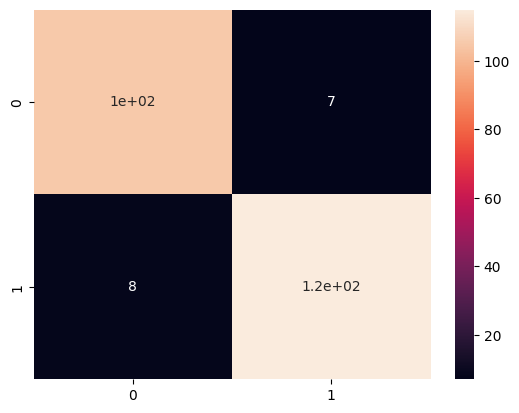

In [42]:
CM=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
especificidade = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc= accuracy_score(y_test, y_pred_rfe)
roc=roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)

mathew = matthews_corrcoef(y_test, y_pred_rfe)
resultados_modelos =pd.DataFrame([['Random Forest',acc, prec,rec,especificidade, f1,roc, loss_log,mathew]],
               columns = ['Modelo', 'Acurácia','Precisão', 'Sensibilidade','Especificidade', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

resultados_modelos

## Comparação com Outros Modelos

In [43]:
data = {        'MLP': y_pred_mlp, 
                'KNN': y_pred_knn, 
                'EXtra tree classifier': y_pred_et_100,
                'XGB': y_pred_xgb, 
                'SVC': y_pred_svc, 
                'SGD': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

modelos = pd.DataFrame(data) 
 
for column in modelos:
    CM=confusion_matrix(y_test,modelos[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    especificidade = TN/(TN+FP)
    loss_log = log_loss(y_test, modelos[column])
    acc= accuracy_score(y_test, modelos[column])
    roc=roc_auc_score(y_test, modelos[column])
    prec = precision_score(y_test, modelos[column])
    rec = recall_score(y_test, modelos[column])
    f1 = f1_score(y_test, modelos[column])
    
    mathew = matthews_corrcoef(y_test, modelos[column])
    resultados =pd.DataFrame([[column,acc, prec,rec,especificidade, f1,roc, loss_log,mathew]],
               columns = ['Modelo', 'Acurácia','Precisão', 'Sensibilidade','Especificidade', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    resultados_modelo = resultados.append(resultados, ignore_index = True)

resultados_modelo


,Modelo,Acurácia,Precisão,Sensibilidade,Especificidade,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,GBM,0.902128,0.896825,0.918699,0.883929,0.907631,0.901314,3.527677,0.803854
1,GBM,0.902128,0.896825,0.918699,0.883929,0.907631,0.901314,3.527677,0.803854


### Conclusões
* Como pode ser observado nos resultados acima, o classificador XGBoost se destaca como o de melhor desempenho, apresentando a maior acurácia de teste (0,9191), sensibilidade (0,943), especificidade (0,89), além do maior F1-score (0,9243) e o menor Log Loss (0,2079).

### Curva ROC AUC 

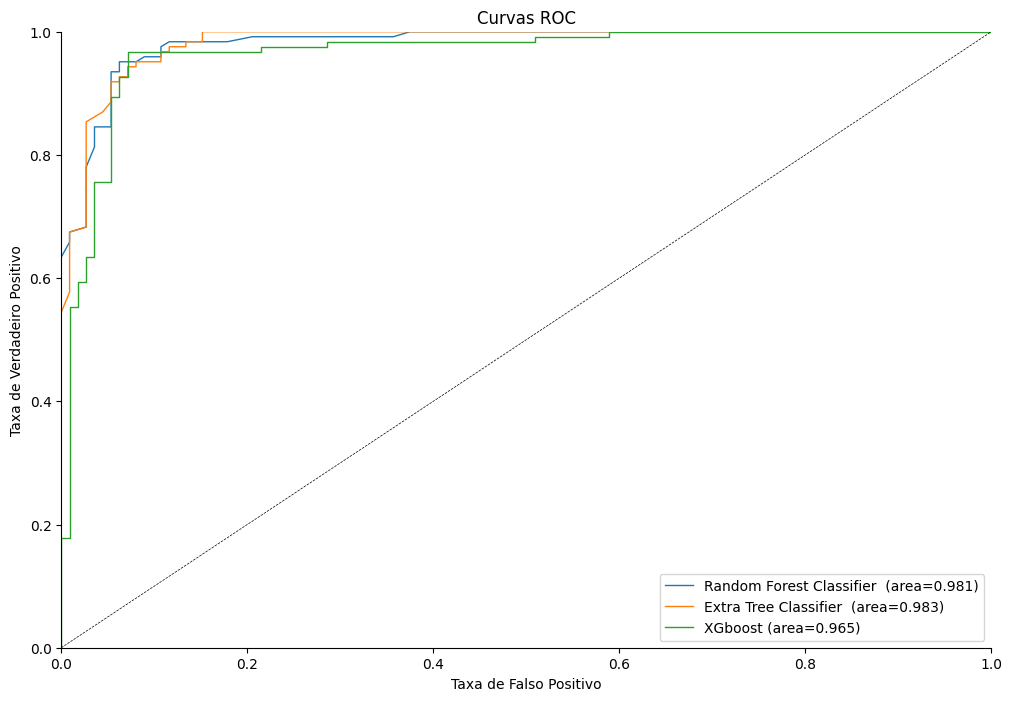

In [44]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_100.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('Taxa de Falso Positivo')
ax.set_ylabel('Taxa de Verdadeiro Positivo')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Curvas ROC')
sns.despine()

Observa-se que a maior área média sob a curva (AUC), de 0,950, é alcançada pelo Extra Tree Classifier.



## Curva Precision Recall 

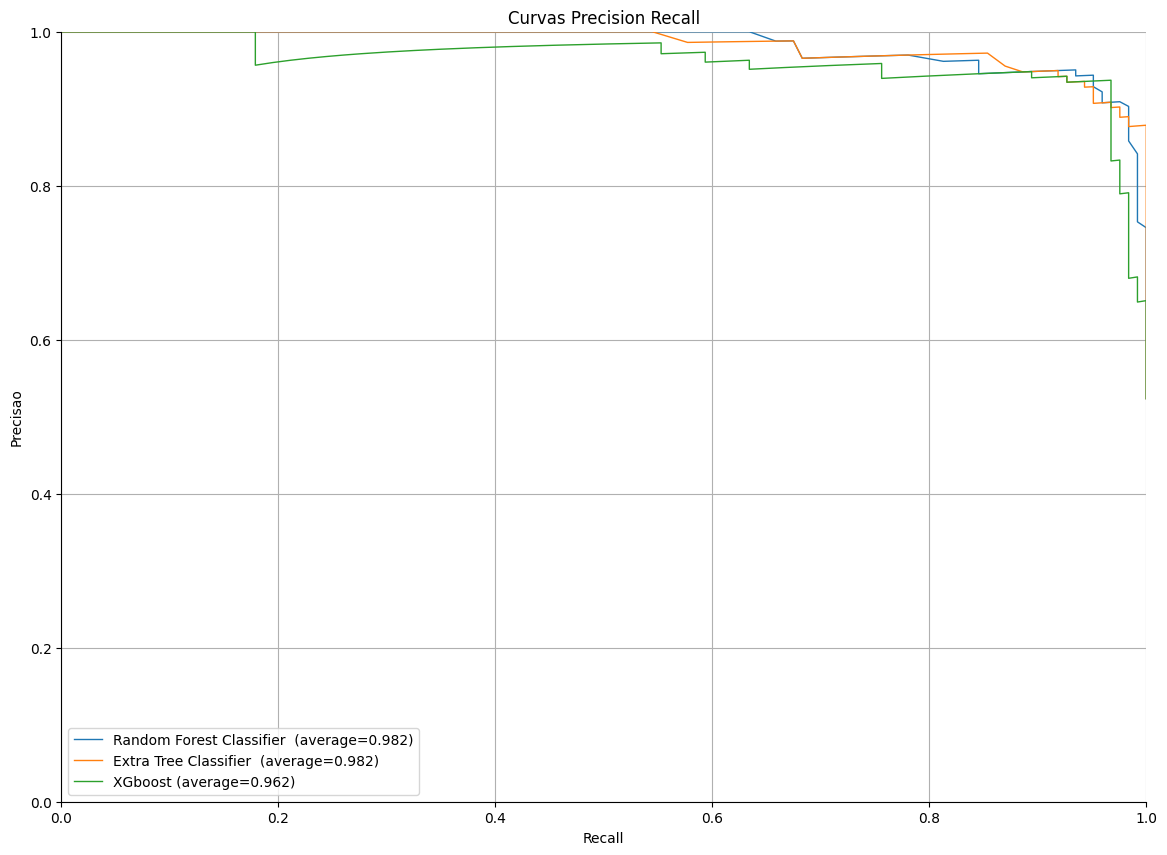

In [45]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    precisao, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    media_precisao = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precisao, label='%s (average=%.3f)'%(label,media_precisao),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_100.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precisao')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Curvas Precision Recall')
sns.despine()

## 10. **Seleção de Atributos**<a id='model-atrib'></a>

* A seleção de atributos será realizada para identificar as características mais relevantes para a previsão de doenças cardíacas. Diferentes métodos de seleção serão utilizados, como correlação de Pearson, teste qui-quadrado, Recursive Feature Elimination (RFE) e seleção de atributos embutida em modelos.

In [46]:
num_atrib=11

def seletor_cor(X, y,num_atrib):
    cor_lista = []
    nome_atributo = X.columns.tolist()
    # calcula a correlação com y
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_lista.append(cor)
    # replace NaN with 0
    cor_lista = [0 if np.isnan(i) else i for i in cor_lista]
    # fnome do atributo
    cor_atributo = X.iloc[:,np.argsort(np.abs(cor_lista))[-num_atrib:]].columns.tolist()
    # seleção de atributo? 0 para não, 1 sim
    cor_suporte = [True if i in cor_atributo else False for i in nome_atributo]
    return cor_suporte, cor_atributo
cor_suporte, cor_atributo = seletor_cor(X, y,num_atrib)
print(str(len(cor_atributo)), 'atributos selecionados')

11 atributos selecionados


In [47]:
X_norm = MinMaxScaler().fit_transform(X)
chi_seletor = SelectKBest(chi2, k=num_atrib)
chi_seletor.fit(X_norm, y)
chi_suporte = chi_seletor.get_support()
chi_atributo = X.loc[:,chi_suporte].columns.tolist()
print(str(len(chi_atributo)), 'atributos selecionados')

11 atributos selecionados


In [48]:

rfe_seletor = RFE(estimator=LogisticRegression(), n_features_to_select=num_atrib, step=10, verbose=5)
rfe_seletor.fit(X_norm, y)
rfe_suporte = rfe_seletor.get_support()
rfe_atributo = X.loc[:,rfe_suporte].columns.tolist()
print(str(len(rfe_atributo)), 'atributos selecionado')

Fitting estimator with 15 features.
11 atributos selecionado


In [49]:
seletor_lr_embutido = SelectFromModel(LogisticRegression(penalty="l2", solver='lbfgs'), max_features=num_atrib)
seletor_lr_embutido.fit(X_norm, y)

suporte_lr_embutido = seletor_lr_embutido.get_support()
caracteristica_lr_embutida = X.loc[:,suporte_lr_embutido].columns.tolist()
print(str(len(caracteristica_lr_embutida)), 'características selecionadas')

8 características selecionadas


In [50]:
seletor_rf_embutido = SelectFromModel(RandomForestClassifier(n_estimators=100, criterion='gini'), max_features=num_atrib)
seletor_rf_embutido.fit(X, y)

suporte_rf_embutido = seletor_rf_embutido.get_support()
caracteristica_rf_embutida = X.loc[:,suporte_rf_embutido].columns.tolist()
print(str(len(caracteristica_rf_embutida)), 'características selecionadas')

9 características selecionadas


In [51]:

# Separar características e alvo
X = dt.drop('target', axis=1)
y = dt['target']

# Assumindo que num_atrib foi definido em algum lugar anterior no código

num_atrib = 6  
# Criar e ajustar o RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=semente)  
rf.fit(X, y)

# Usar SelectFromModel 
seletor_rf_embutido = SelectFromModel(rf, max_features=num_atrib)
seletor_rf_embutido.fit(X, y)

# Get the selected features
suporte_rf_embutido = seletor_rf_embutido.get_support()
caracteristica_rf_embutida = X.loc[:, suporte_rf_embutido].columns.tolist()

# Print the number and list of selected features
print(str(len(caracteristica_rf_embutida)), 'características selecionadas')
print(caracteristica_rf_embutida)

6 características selecionadas
['cholesterol', 'max_heart_rate_achieved', 'st_depression', 'chest_pain_type_assintomático', 'st_slope_cima', 'st_slope_plana']


In [52]:

# Define nome_caracteristica
nome_caracteristica = X.columns

# Create the DataFrame
selecao_caracteristica_df = pd.DataFrame({'Caracteristica':nome_caracteristica, 
                                          'Pearson':cor_suporte, 
                                          'Chi-2':chi_suporte, 
                                          'RFE':rfe_suporte, 
                                          'Logistics':suporte_lr_embutido, 
                                          'Random Forest':suporte_rf_embutido})

# calcula a coluna 'total
selecao_caracteristica_df['Total'] = np.sum(selecao_caracteristica_df, axis=1)

# Sort the DataFrame
selecao_caracteristica_df = selecao_caracteristica_df.sort_values(['Total','Caracteristica'] , ascending=False)

# Reset the index
selecao_caracteristica_df.index = range(1, len(selecao_caracteristica_df)+1)

# Display the top features
display(selecao_caracteristica_df.head(num_atrib))

,Caracteristica,Pearson,Chi-2,RFE,Logistics,Random Forest,Total
1,st_slope_plana,True,True,True,True,True,5
2,st_slope_cima,True,True,True,True,True,5
3,st_depression,True,True,True,True,True,5
4,chest_pain_type_assintomático,True,True,True,True,True,5
5,sex_masculino,True,True,True,True,False,4
6,max_heart_rate_achieved,True,True,True,False,True,4


In [53]:
X = dt.drop(['target','resting_blood_pressure','sex_masculino','chest_pain_type_dor não anginosa'],axis=1)
y = dt['target']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=semente)

In [55]:
escalar = MinMaxScaler()
X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']] = escalar.fit_transform(X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,chest_pain_type_angina típica,chest_pain_type_assintomático,rest_ecg_hipertrofia ventricular esquerda,rest_ecg_normal,st_slope_cima,st_slope_plana
79,0.428571,0.419552,0,0.762963,0,0.295455,0,1,0,1,0,1
134,0.673469,0.598778,0,0.392593,1,0.409091,0,1,0,0,0,1
999,0.489796,0.378819,0,0.911111,0,0.295455,1,0,1,0,0,1
976,0.469388,0.521385,0,0.607407,0,0.352273,0,0,1,0,1,0
1097,0.183673,0.437882,0,0.762963,0,0.295455,0,0,0,1,1,0


In [56]:
X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']] = escalar.transform(X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,chest_pain_type_angina típica,chest_pain_type_assintomático,rest_ecg_hipertrofia ventricular esquerda,rest_ecg_normal,st_slope_cima,st_slope_plana
1050,0.612245,0.505092,0,0.407407,0,0.409091,0,1,1,0,0,1
1055,0.142857,0.574338,0,0.659259,1,0.295455,0,1,1,0,1,0
1154,0.632653,0.443992,1,0.496296,0,0.545455,0,0,0,1,0,1
214,0.571429,0.446029,0,0.718519,0,0.295455,0,0,0,0,1,0
541,0.693878,0.415479,0,0.407407,1,0.431818,0,0,0,0,0,1


In [59]:
modelos = ObterModelosBase()
nomes,resultados = LinhaBase2(X_train, y_train,modelos)

LR_L2: 0.837783 (0.037008)
LDA: 0.832453 (0.036648)
KNN7: 0.827122 (0.035782)
KNN5: 0.818634 (0.046739)
KNN9: 0.822855 (0.030458)
KNN11: 0.830279 (0.031257)
CART: 0.867673 (0.028972)
NB: 0.840975 (0.033282)
SVM Linear: 0.828163 (0.033700)
SVM RBF: 0.818623 (0.041651)
AB: 0.822855 (0.039001)
GBM: 0.855960 (0.030100)
RF_Ent100: 0.916792 (0.029211)
RF_Gini100: 0.909334 (0.029321)
ET100: 0.906108 (0.028791)
ET500: 0.897609 (0.030365)
MLP: 0.839888 (0.036833)
SGD3000: 0.776985 (0.048035)
XGB_2000: 0.898685 (0.028464)
XGB_500: 0.905067 (0.031963)
XGB_100: 0.903981 (0.025959)
XGB_1000: 0.904004 (0.034852)
ET1000: 0.898673 (0.030393)


## Soft voting

In [60]:
clf1=RandomForestClassifier(criterion='entropy',n_estimators=100)

clf2=DecisionTreeClassifier()
clf3=xgb.XGBClassifier(n_estimators= 1000)
clf4=ExtraTreesClassifier(n_estimators= 500)

clf5=GradientBoostingClassifier(n_estimators=100,max_features='sqrt')


eclf1 = VotingClassifier(estimators=[('rfe', clf1), ('decc', clf2), ('xgb', clf3),('ET',clf4),('gb',clf5),], 
                         voting='soft', weights=[4,1,2,3,1])
eclf1.fit(X_train,y_train)
y_pred_sv =eclf1.predict(X_test)

## 11. **Avaliação de Modelo**<a id='model-inter'></a>

* Nesta seção, o modelo final selecionado após a etapa de seleção de atributos será avaliado. Novamente, serão utilizadas as métricas de desempenho mencionadas anteriormente.

,Modelo,Acurácia,Precisão,Sensibilidade,Especificidade,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Soft Voting,0.931915,0.934959,0.934959,0.928571,0.934959,0.931765,2.454036,0.863531


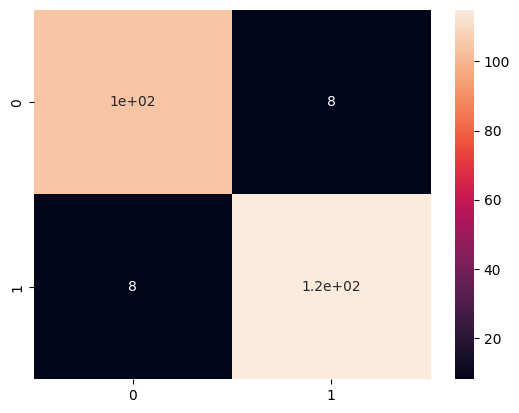

In [61]:
CM=confusion_matrix(y_test,y_pred_sv)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
especificidade = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_sv)
acc= accuracy_score(y_test, y_pred_sv)
roc=roc_auc_score(y_test, y_pred_sv)
prec = precision_score(y_test, y_pred_sv)
rec = recall_score(y_test, y_pred_sv)
f1 = f1_score(y_test, y_pred_sv)

mathew = matthews_corrcoef(y_test, y_pred_sv)
resultados_modelo =pd.DataFrame([['Soft Voting',acc, prec,rec,especificidade, f1,roc, loss_log,mathew]],
               columns = ['Modelo', 'Acurácia','Precisão', 'Sensibilidade','Especificidade', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

resultados_modelo

In [62]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

In [63]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

In [64]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [65]:
et_1000 = ExtraTreesClassifier(n_estimators= 1000)
et_1000.fit(X_train,y_train)
y_pred_et1000 = et_1000.predict(X_test)

In [66]:
xgb = xgb.XGBClassifier(n_estimators= 1000)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [67]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [68]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

In [69]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

In [70]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

In [71]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

In [72]:
data = {
             'Random Forest Entropy': y_pred_rfe, 
                'MLP2': y_pred_mlp, 
                'KNN2': y_pred_knn, 
                'EXtra tree classifier': y_pred_et1000,
                'XGB2': y_pred_xgb, 
                'SVC2': y_pred_svc, 
                'SGD2': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

modelos = pd.DataFrame(data) 
 
for column in modelos:
    CM=confusion_matrix(y_test,modelos[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    especificidade = TN/(TN+FP)
    loss_log = log_loss(y_test, modelos[column])
    acc= accuracy_score(y_test, modelos[column])
    roc=roc_auc_score(y_test, modelos[column])
    prec = precision_score(y_test, modelos[column])
    rec = recall_score(y_test, modelos[column])
    f1 = f1_score(y_test, modelos[column])
    
    mathew = matthews_corrcoef(y_test, modelos[column])
    resultados =pd.DataFrame([[column,acc, prec,rec,especificidade, f1,roc, loss_log,mathew]],
               columns = ['Modelo', 'Acurácia','Precisão', 'Sensibilidade','Especificidade', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    resultados_modelo = resultados_modelo.append(resultados, ignore_index = True)


resultados_modelo

,Modelo,Acurácia,Precisão,Sensibilidade,Especificidade,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Soft Voting,0.931915,0.934959,0.934959,0.928571,0.934959,0.931765,2.454036,0.863531
1,Random Forest Entropy,0.923404,0.920000,0.934959,0.910714,0.927419,0.922837,2.760790,0.846473
2,MLP2,0.863830,0.864000,0.878049,0.848214,0.870968,0.863132,4.908072,0.726949
3,KNN2,0.876596,0.856061,0.918699,0.830357,0.886275,0.874528,4.447940,0.753998
4,EXtra tree classifier,0.919149,0.919355,0.926829,0.910714,0.923077,0.918772,2.914168,0.837909
5,XGB2,0.931915,0.942149,0.926829,0.937500,0.934426,0.932165,2.454036,0.863765
6,SVC2,0.868085,0.865079,0.886179,0.848214,0.875502,0.867197,4.754695,0.735515
7,SGD2,0.872340,0.884298,0.869919,0.875000,0.877049,0.872459,4.601317,0.744433
8,Adaboost,0.880851,0.892562,0.878049,0.883929,0.885246,0.880989,4.294563,0.761480
9,CART,0.889362,0.936937,0.845528,0.937500,0.888889,0.891514,3.987808,0.783370


In [ ]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,eclf1.predict_proba(X_test),label='Soft Voting Classifier ',l='-')
roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_1000.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Curvas ROC')
sns.despine()

In [ ]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))
precision_recall_plot(y_test,eclf1.predict_proba(X_test),label='Soft voting classifier ',l='-')
precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_1000.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precisão')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()


## Importância de Características

In [ ]:
importancia_carac = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
importancia_carac.nlargest(20).plot(kind='barh')

### Baseado no F1 Score, O Melhor Modelo é

In [ ]:
best_model_row = resultados_modelo.loc[resultados_modelo['F1 Score'].idxmax()]

print("O melhor modelo é:", best_model_row['Modelo'])

In [ ]:
joblib.dump(rf_ent, '../models/modelo.joblib')

## 12. Conclusão  <a id='data-conc'></a>

* Neste projeto, foi explorado um conjunto de dados abrangente para construir modelos preditivos de doenças cardíacas. Uma análise exploratória dos dados, pré-processamento, seleção de atributos e treinamento de diversos modelos de aprendizado de máquina foram realizados. Ao comparar seus desempenhos, o modelo mais eficaz para a previsão de doenças cardíacas foi identificado.

* Conforme observado, o ensemble stacking de algoritmos de aprendizado de máquina poderosos resultou em um desempenho superior a qualquer modelo individual.
* Também foi realizada a interpretação do segundo algoritmo com melhor desempenho, ou seja, o algoritmo Random Forest.
* Diferente do encontrado na EDA, as 5 características com maior contribuição são:
1. **Max heart Rate achieved**<br>
2. **Cholestrol**<br>
3. **st_depression**<br>
4. **Age**<br>
5. **exercise_induced_angina**<br>
